# Линейные модели в машинном обучении. <br> Оценка удоя и качества молока для молочного хозяйства

Фермер молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям. Необходимо настроить модели машинного обучения для предсказания удоя и качества молока.

В распоряжении имеются следующие данные:

- `ferma_main.csv` - данные о стаде фермера на текущий момент:
  - `id` — уникальный идентификатор коровы.
  - `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
  - `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
  - `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
  - `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
  - `Порода` — порода коровы.
  - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
  - `порода папы_быка` — порода папы коровы.
  - `Жирность,%` — содержание жиров в молоке (в процентах).
  - `Белок,%` — содержание белков в молоке (в процентах).
  - `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
  - `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
        
- `ferma_dad.csv` - имя папы каждой коровы в стаде фермера:
  - `id` — уникальный идентификатор коровы.
  - `Имя Папы` — имя папы коровы.

- `cow_buy.csv` — данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:
  - `Порода` — порода коровы.
  - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
  - `порода папы_быка` — порода папы коровы.
  - `Имя_папы` — имя папы коровы.
  - `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
  - `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
  - `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете `ferma_main.csv` можно разделить на группы:
- Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
- Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
- Характеристика пастбища: `Тип пастбища`.
- Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.

Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.

Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. 

Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

## Цели исследования
- Предобработка данных
- Рассмотрение общей инфрмации о коровах в стаде фермера
- Обучение линейных моделей машинного обучения для:
    - предсказания удоя для продаваемых пастбищем коров
    - предсказание качества вкуса молока по критериям фермера
    - предоставление рекомендаций по покупке коров удовлетворяющих всем критериям

## Ход работы

**Общий план исследования:**
- Загрузка данных
- Предобработка данных (оценка их качестваи при необходимости исправление)
- Исследовательский анализ данных
- Разбивка и подготовка данных к обучению
- Обучение моделей
- Тестирование и верификации
- Выводы

### Подготовка к работе

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix

from scipy import stats as st

!pip install phik -q # -q убирает необязательные выводы в командах Linux

#import phik
#from phik import resources, report

from phik.report import plot_correlation_matrix
from phik import report

### Загрузка и обзор данных

#### Загрузка данных

In [ ]:
main = pd.read_csv('...', sep=';', decimal=',')
dad = pd.read_csv('...', sep=';', decimal=',')
buy = pd.read_csv('...', sep=';', decimal=',')

#### Обзор данных

In [3]:
display(main.head(10))
main.info()

display(dad.head(10))
dad.info()

display(buy.head(10))
buy.info()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Как видно данные совпадают с предоставленным описанием структуры данных.

В исходных данных содержится информация о 634 коровах в стаде фермера и об отцах 629 коров. К покупке доступно 20 коров.

### Предобработка данных

В этом разделе рассмотрим пропуски в данных и проведем необходимые преобразования типов и добавим необходимые столбцы.

#### Переименование столбцов и добавление новых

Сперва для удобства переименуем следующие столбцы:
- `Удой, кг` &rarr; `yield`
- `ЭКЕ (Энергетическая кормовая единица)` &rarr; `energetic_unit` 
- `Сырой протеин, г` &rarr; `protein`
- `СПО (Сахаро-протеиновое соотношение)` &rarr; `sugar_to_protein`
- `Порода` &rarr; `breed`
- `Тип пастбища`  &rarr; `pasture`
- `порода папы_быка` &rarr; `dad_breed`
- `Жирность,%` &rarr; `milk_fat`
- `Белок,%` &rarr; `milk_protein`
- `Вкус молока` &rarr; `flavour`
- `Возраст` &rarr; `age`
- `Имя_папы` &rarr; `dad_name`
- `Имя Папы` &rarr; `dad_name`
- `Текущая_жирность,%` &rarr; `milk_fat`
- `Текущий_уровень_белок,%` &rarr; `milk_protein`

In [4]:
main = main.rename(columns={'Удой, кг' : 'yield',
                            'ЭКЕ (Энергетическая кормовая единица)':'energetic_unit',
                            'Сырой протеин, г':'protein',
                            'СПО (Сахаро-протеиновое соотношение)':'sugar_to_protein',
                            'Порода':'breed',
                            'Тип пастбища':'pasture',
                            'порода папы_быка':'dad_breed',
                            'Жирность,%':'milk_fat',
                            'Белок,%':'milk_protein',
                            'Вкус молока':'flavour',
                            'Возраст':'age'})

buy = buy.rename(columns={
                            'Порода':'breed',\
                            'Тип пастбища':'pasture',\
                            'порода папы_быка':'dad_breed',\
                            'Текущая_жирность,%':'milk_fat',\
                            'Текущий_уровень_белок,%':'milk_protein',\
                            'Возраст':'age',\
                            'Имя_папы':'dad_name'})

dad = dad.rename(columns={
                            'Имя Папы':'dad_name'})

In [5]:
display(main.head(1))
display(dad.head(1))
display(buy.head(1))

,id,yield,energetic_unit,protein,sugar_to_protein,breed,pasture,dad_breed,milk_fat,milk_protein,flavour,age
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет


,id,dad_name
0,1,Буйный


,breed,pasture,dad_breed,dad_name,milk_fat,milk_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет


Добавим в таблицу `main` столбец `dad_name` из таблицы `dad`

In [6]:
main = main.merge(dad, on='id', how='left')

display(main.head())
main.info()

,id,yield,energetic_unit,protein,sugar_to_protein,breed,pasture,dad_breed,milk_fat,milk_protein,flavour,age,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 633
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   yield             634 non-null    int64  
 2   energetic_unit    634 non-null    float64
 3   protein           634 non-null    int64  
 4   sugar_to_protein  634 non-null    float64
 5   breed             634 non-null    object 
 6   pasture           634 non-null    object 
 7   dad_breed         634 non-null    object 
 8   milk_fat          634 non-null    float64
 9   milk_protein      634 non-null    float64
 10  flavour           634 non-null    object 
 11  age               634 non-null    object 
 12  dad_name          634 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 69.3+ KB


#### Рассмотрение пропусков в данных

Рассмотрим в каких каких столбцах сколько пропусков находится

In [7]:
print('Число пропусков в main')
print(main.isna().sum())

print('Число пропусков в buy')
print(buy.isna().sum())

Число пропусков в main
id                  0
yield               0
energetic_unit      0
protein             0
sugar_to_protein    0
breed               0
pasture             0
dad_breed           0
milk_fat            0
milk_protein        0
flavour             0
age                 0
dad_name            0
dtype: int64
Число пропусков в buy
breed           0
pasture         0
dad_breed       0
dad_name        0
milk_fat        0
milk_protein    0
age             0
dtype: int64


Пропуски в данных отсутствуют.

#### Явные и неявные дубликаты

Рассмотрим наличие явных и неявных дубликатов в данных.

In [8]:
print('Число явных дубликатов в main:', main.duplicated().sum())
print('Число явных дубликатов в buy:', buy.duplicated().sum())
#удаление дубликатов
main = main.drop_duplicates()
buy = buy.drop_duplicates()

#print('Повторяющиеся  id в main после удаления дубликатов:', main['id'].value_counts().sort_values(ascending=False).head())

Число явных дубликатов в main: 5
Число явных дубликатов в buy: 4


В таблицах `main` и `buy` было 5 и 4 дубликатов соответственно. Удалили их.

In [9]:
print('Таблица main')
print('Породы:', main['breed'].unique())
print('Породы пап:', main['dad_breed'].unique())
print('Имена пап:', main['dad_name'].unique())
print('Пастбища:', main['pasture'].unique())
print('Вкус:', main['flavour'].unique())
print('Возраст:', main['age'].unique())

print('Таблица buy')
print('Породы:', buy['breed'].unique())
print('Породы пап:', buy['dad_breed'].unique())
print('Имена пап:', buy['dad_name'].unique())
print('Пастбища:', buy['pasture'].unique())
print('Возраст:', buy['age'].unique())

Таблица main
Породы: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Породы пап: ['Айдиал' 'Соверин' 'Айдиалл']
Имена пап: ['Буйный' 'Соловчик' 'Барин' 'Геркулес']
Пастбища: ['Равнинное' 'Равнинные' 'Холмистое']
Вкус: ['вкусно' 'не вкусно']
Возраст: ['более_2_лет' 'менее_2_лет']
Таблица buy
Породы: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Породы пап: ['Айдиал' 'Соверин']
Имена пап: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Пастбища: ['холмистое' 'равнинное']
Возраст: ['более_2_лет' 'менее_2_лет']


Обнаружились неявные дубликаты в столбцах `pasture` и `dad_breed`. Устраним их приведя к нижнему регистру и единственному числу

In [10]:
main['pasture'] = main['pasture'].str.lower().replace('равнинные', 'равнинное')
main['dad_breed'] = main['dad_breed'].replace('Айдиалл', 'Айдиал')

#### Итоги предобработки данных

В ходе предобработки были переименованы столбцы, удалены все дубликаты и устранены неявные, количественные типы данных были приведены к вещественному типу.

### Исследовательский анализ данных

Опишем общую информацию о коровах в стаде фермера
#### Удой

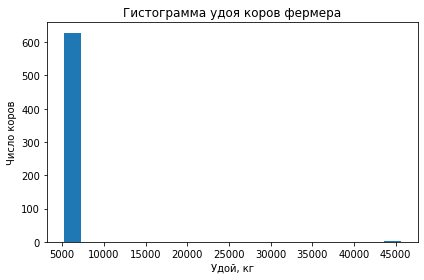

In [11]:
fig, ax = plt.subplots()

ax.hist(main['yield'], bins=20)

ax.set_xlabel('Удой, кг')
ax.set_ylabel('Число коров')
ax.set_title('Гистограмма удоя коров фермера')
fig.tight_layout()
plt.show()

В данных присутствует явная аномалия: корова с удоем 45т. Удалим всех коров с удоем более 10т.

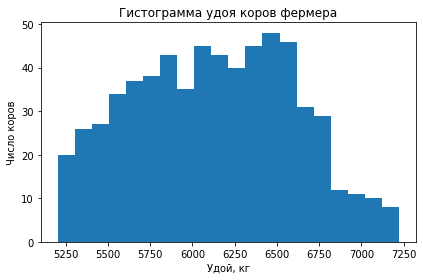

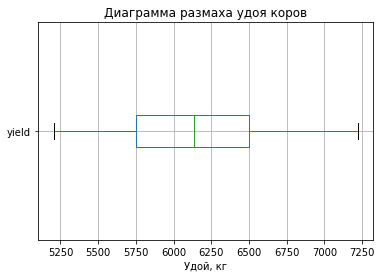

In [12]:
main = main[main['yield'] < 10000]

fig, ax = plt.subplots()

ax.hist(main['yield'], bins=20)

ax.set_xlabel('Удой, кг')
ax.set_ylabel('Число коров')
ax.set_title('Гистограмма удоя коров фермера')
fig.tight_layout()
plt.show()

bxp = main.boxplot('yield', vert=False)
plt.gca().set_xlabel('Удой, кг')
plt.gca().set_title('Диаграмма размаха удоя коров')
plt.show()

Распределение похоже на нормальное, но с отрезанными хвостами

#### Энергетическая кормовая единица

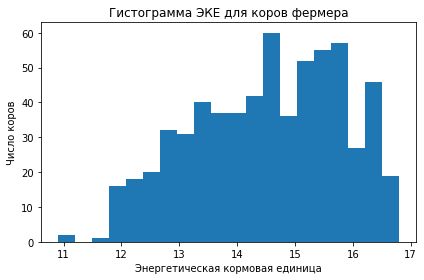

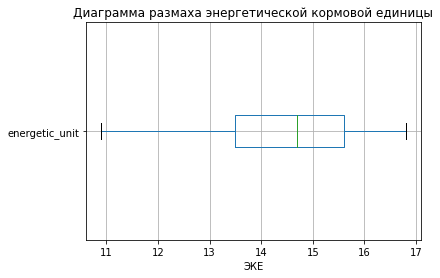

In [13]:
fig, ax = plt.subplots()

ax.hist(main['energetic_unit'], bins=20)

ax.set_xlabel('Энергетическая кормовая единица')
ax.set_ylabel('Число коров')
ax.set_title('Гистограмма ЭКЕ для коров фермера')
fig.tight_layout()
plt.show()

bxp = main.boxplot('energetic_unit', vert=False)
plt.gca().set_xlabel('ЭКЕ')
plt.gca().set_title('Диаграмма размаха энергетической кормовой единицы')
plt.show()

Распределение похоже на нормальное с отрезанными хвостами и некоторым количеством выбросов больше медианы

#### Сырой протеин

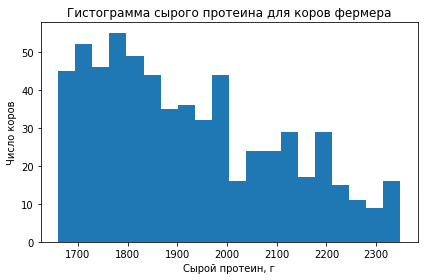

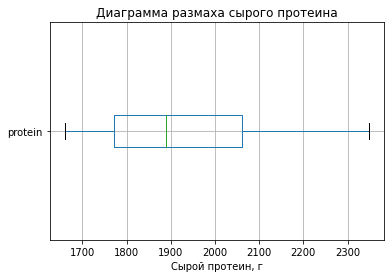

In [14]:
fig, ax = plt.subplots()

ax.hist(main['protein'], bins=20)

ax.set_xlabel('Сырой протеин, г')
ax.set_ylabel('Число коров')
ax.set_title('Гистограмма сырого протеина для коров фермера')
fig.tight_layout()
plt.show()

bxp = main.boxplot('protein', vert=False)
plt.gca().set_xlabel('Сырой протеин, г')
plt.gca().set_title('Диаграмма размаха сырого протеина')
plt.show()

#### Сахаро-протеиновое соотношение

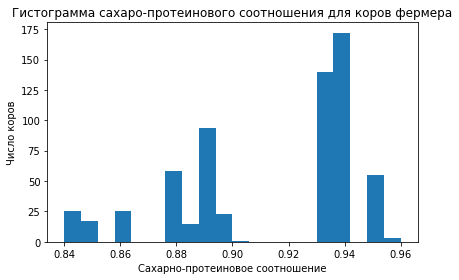

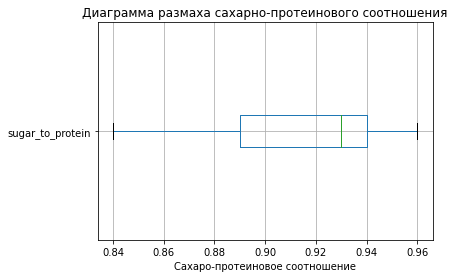

In [15]:
fig, ax = plt.subplots()

ax.hist(main['sugar_to_protein'], bins=20)

ax.set_xlabel('Сахарно-протеиновое соотношение')
ax.set_ylabel('Число коров')
ax.set_title('Гистограмма сахаро-протеинового соотношения для коров фермера')
fig.tight_layout()
plt.show()

bxp = main.boxplot('sugar_to_protein', vert=False)
plt.gca().set_xlabel('Сахаро-протеиновое соотношение')
plt.gca().set_title('Диаграмма размаха сахарно-протеинового соотношения')
plt.show()

Распределение сильно хаотично и имеет несколько пиков

#### Порода

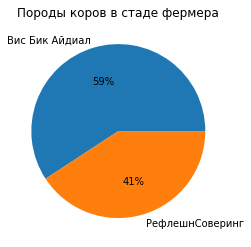

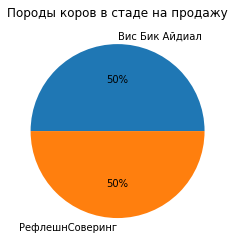

In [16]:
main.pivot_table(index='breed', aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Породы коров в стаде фермера')
plt.show()

buy.pivot_table(index='breed', aggfunc='count').plot(y='age', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Породы коров в стаде на продажу')
plt.show()

#### Порода папы быка

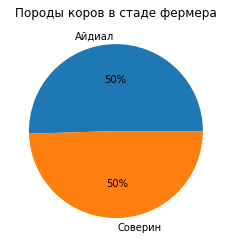

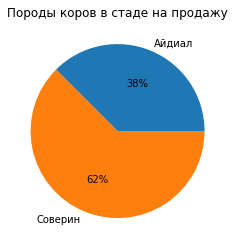

In [17]:
main.pivot_table(index='dad_breed', aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Породы коров в стаде фермера')
plt.show()

buy.pivot_table(index='dad_breed', aggfunc='count').plot(y='age', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Породы коров в стаде на продажу')
plt.show()

#### Тип пастбища

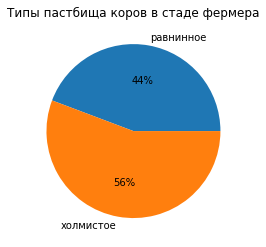

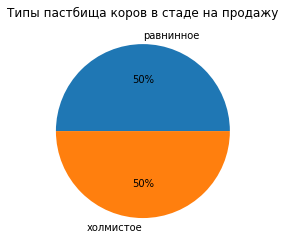

In [18]:
main.pivot_table(index='pasture', aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Типы пастбища коров в стаде фермера')
plt.show()

buy.pivot_table(index='pasture', aggfunc='count').plot(y='age', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Типы пастбища коров в стаде на продажу')
plt.show()

#### Возраст

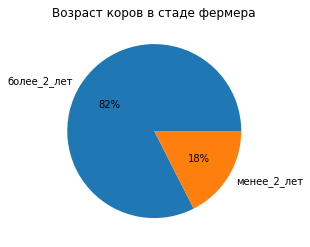

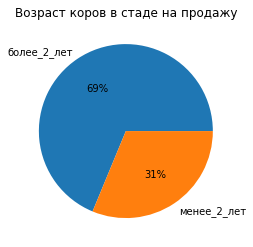

In [19]:
main.pivot_table(index='age', aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Возраст коров в стаде фермера')
plt.show()

buy.pivot_table(index='age', aggfunc='count').plot(y='breed', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Возраст коров в стаде на продажу')
plt.show()

#### Жирность молока

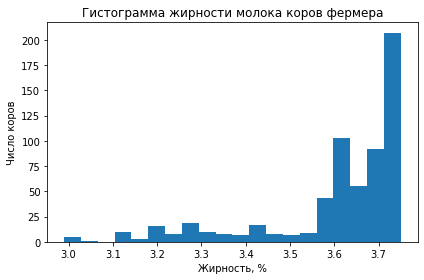

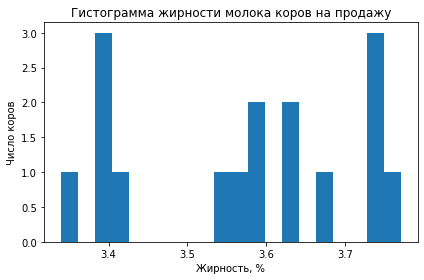

In [20]:
fig, ax = plt.subplots()

ax.hist(main['milk_fat'], bins=20)

ax.set_xlabel('Жирность, %')
ax.set_ylabel('Число коров')
ax.set_title('Гистограмма жирности молока коров фермера')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()

ax.hist(buy['milk_fat'], bins=20)

ax.set_xlabel('Жирность, %')
ax.set_ylabel('Число коров')
ax.set_title('Гистограмма жирности молока коров на продажу')
fig.tight_layout()
plt.show()

Жирность молока коров на продажу заметно скачет, но это неудивительно т.к. выборка небольшая

#### Белок в молоке

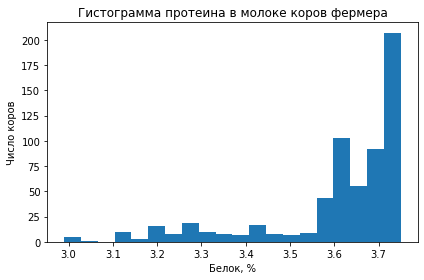

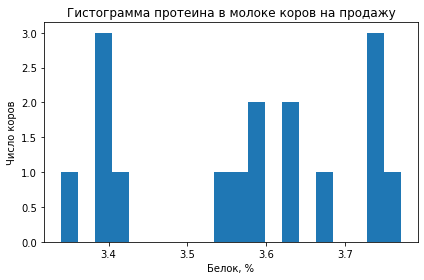

In [21]:
fig, ax = plt.subplots()

ax.hist(main['milk_fat'], bins=20)

ax.set_xlabel('Белок, %')
ax.set_ylabel('Число коров')
ax.set_title('Гистограмма протеина в молоке коров фермера')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()

ax.hist(buy['milk_fat'], bins=20)

ax.set_xlabel('Белок, %')
ax.set_ylabel('Число коров')
ax.set_title('Гистограмма протеина в молоке коров на продажу')
fig.tight_layout()
plt.show()

Протеин в молоке коров на продажу заметно скачет, но это неудивительно т.к. выборка небольшая

#### Вкус молока

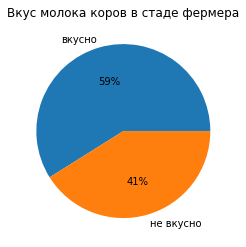

In [22]:
main.pivot_table(index='flavour', aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Вкус молока коров в стаде фермера')
plt.show()

Не смотря на то, что для фермера критически важен вкус молока в его стаде немало (41%) коров с невкусным молоком. Тем не менее для обучения моделей машинного обучения это даже хорошо

#### Выводы по исследовательскому анализу данных

Большинство распределений количественных параметров компактны и отдаленно схожи с нормальными, однако распределение сахарно-протеинового соотношения выглядит хаотично и имеет несколько несвязных пиков. Хотелось бы понимать чем это вызвано

Так же в распоряжении имеются данные лишь по чуть более 600 коровам, хотелось бы иметь данные о большем числе коров для обучения моделей МО.

### Корреляционный анализ признаков

Рассмотрим матрицу корреляции между количественными признаками в таблице `main`

Т.к. не все параметры распределены нормально, использования коэфициента корреляции Пирсона может быть некорректным.

Рассмотрим коэфициент корреляции $\varphi_k$

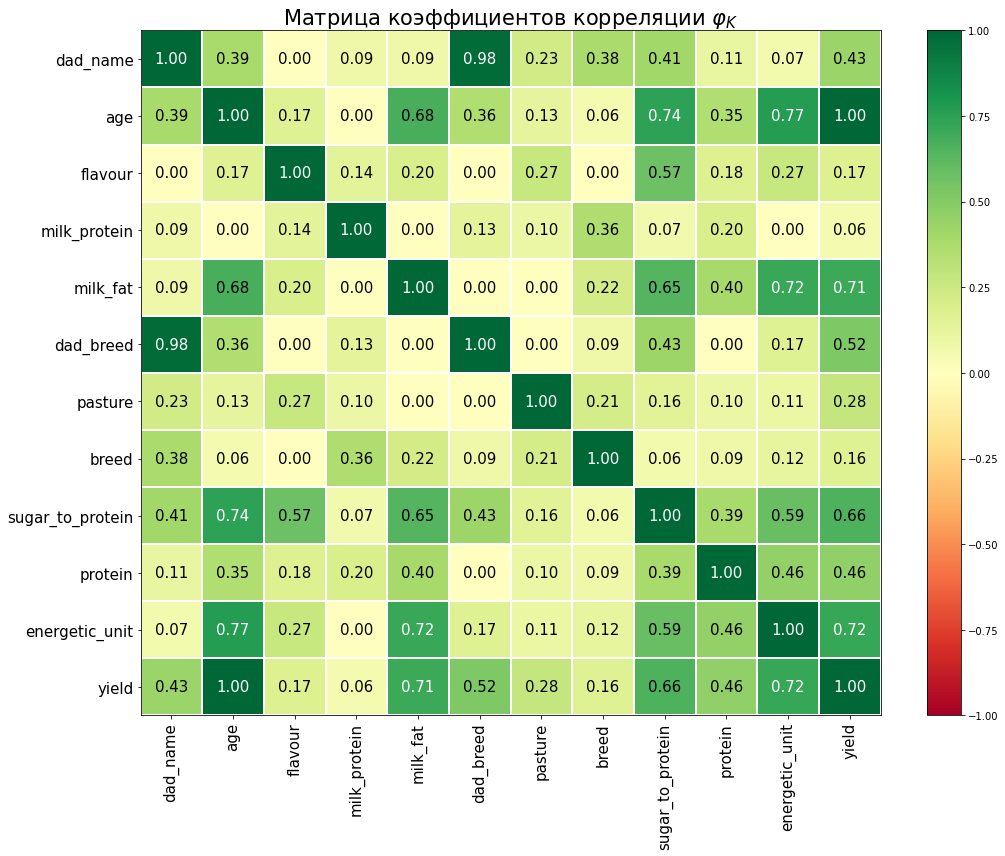

In [23]:
#sns.heatmap(main.corr(), annot=True, cmap='cividis') 

df = main.drop('id', axis=1)

interval_cols = ['yield', 'energetic_unit', 'protein', 'sugar_to_protein', 'milk_fat', 'milk_protein']

# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = df.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"Матрица коэффициентов корреляции $\varphi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

Как видно целевой параметр `Удой (yield)` очень сильно коррелирует с `возрастом (age)`, сильно коррелирует с `энергетической кормовой единицей (energetic_unit)`, `жирностью молока (milk_fat)` и `сахарно-протеиновым соотношением (sugar_to_protein)`, средне коррелирует с `сырым протеином (protein)`, `породой папы` и `именем папы`. Мультиколлинеарными можно считать `породу папы` и `имя папы`. 

Стоит отметить, что коэфициент корреляции $\varphi_k$ показывает не только линейные, но и также нелинейные связи между величинами.

#### Диграмма рассеяния удоя и ЭКЕ для различных категориальных признаков

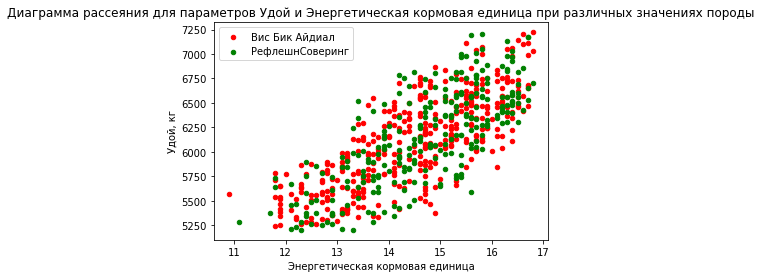

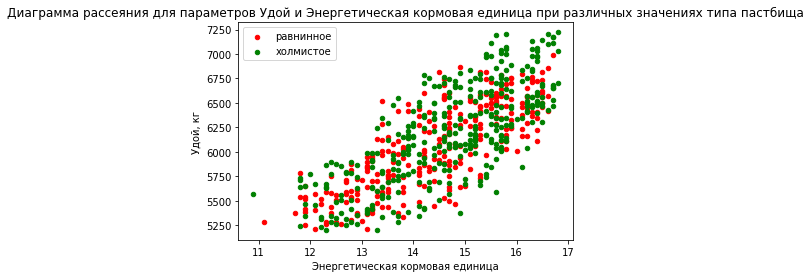

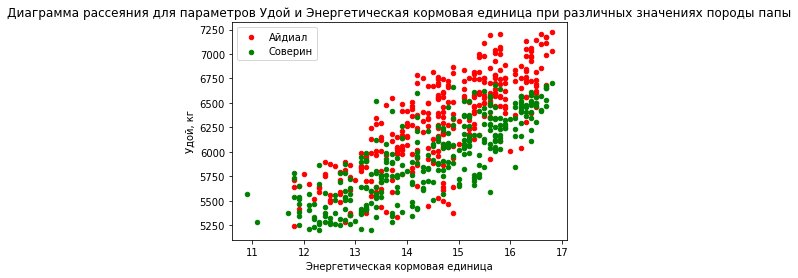

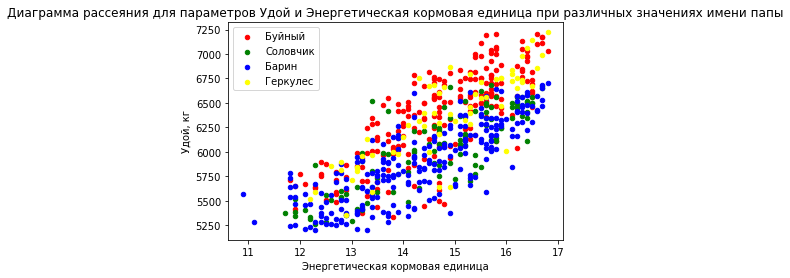

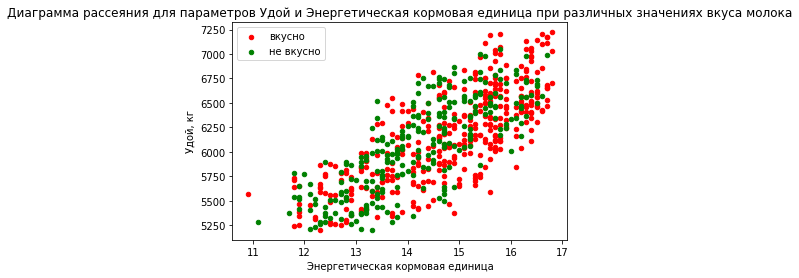

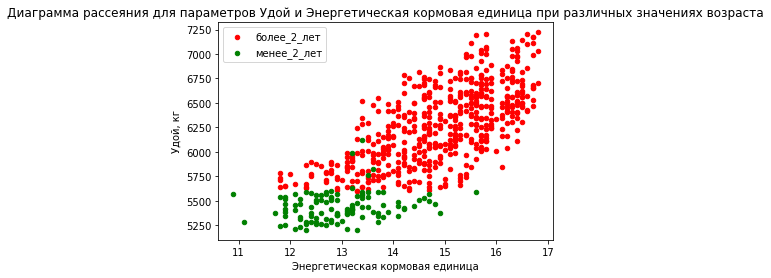

In [24]:
def parametric_scatterplot(parameter, parameter_label,x_value,x_label):
    fig, ax = plt.subplots()
    colors = ['red', 'green', 'blue', 'yellow', 'orange']
    j=0
    for i in main[parameter].unique():
        main[main[parameter]==i].plot(ax= ax, color=colors[j], label=i, x=x_value, y='yield', kind='scatter', xlabel=x_label, ylabel='Удой, кг', title = 'Диаграмма рассеяния для параметров Удой и '+ x_label + ' при различных значениях ' + parameter_label)
        j+=1
    plt.show()

x_value,x_label = 'energetic_unit', 'Энергетическая кормовая единица'

parametric_scatterplot('breed', 'породы', x_value,x_label)
parametric_scatterplot('pasture', 'типа пастбища',  x_value,x_label)
parametric_scatterplot('dad_breed', 'породы папы', x_value,x_label)
parametric_scatterplot('dad_name', 'имени папы', x_value,x_label)
parametric_scatterplot('flavour', 'вкуса молока', x_value,x_label)
parametric_scatterplot('age', 'возраста', x_value,x_label)

#### Диграмма рассеяния удоя и сахарно-протеинового соотношения для различных категориальных признаков

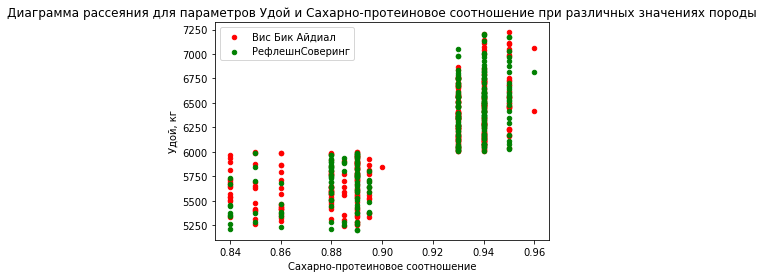

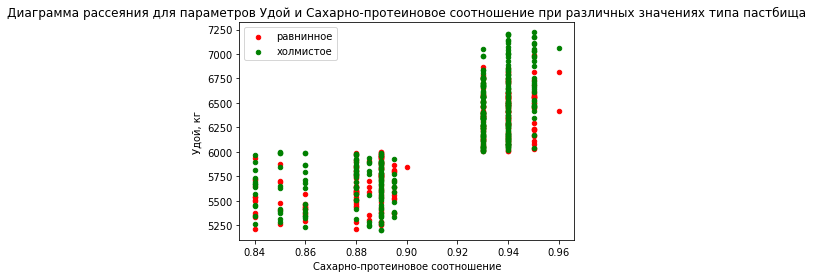

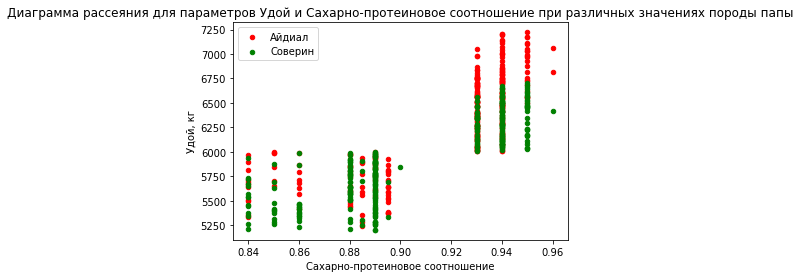

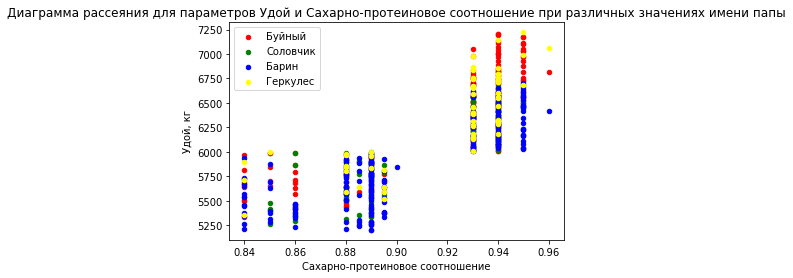

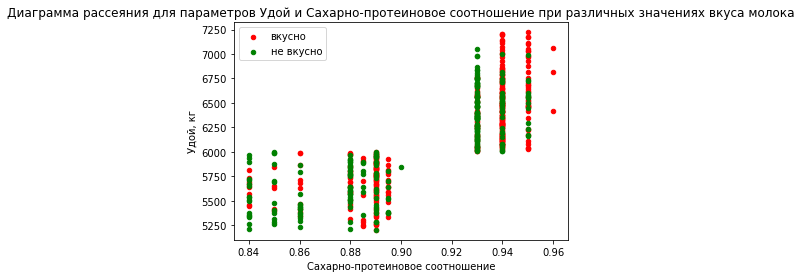

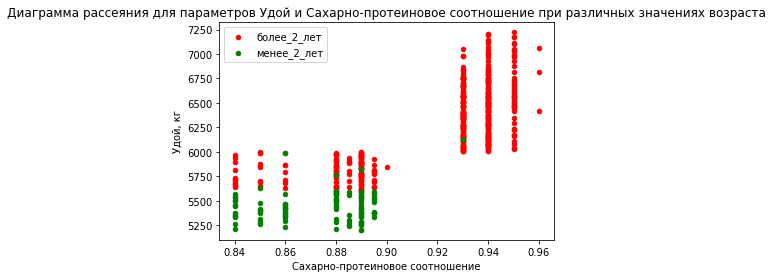

In [25]:
x_value,x_label =  'sugar_to_protein', 'Сахарно-протеиновое соотношение'

parametric_scatterplot('breed', 'породы', x_value,x_label)
parametric_scatterplot('pasture', 'типа пастбища',  x_value,x_label)
parametric_scatterplot('dad_breed', 'породы папы', x_value,x_label)
parametric_scatterplot('dad_name', 'имени папы', x_value,x_label)
parametric_scatterplot('flavour', 'вкуса молока', x_value,x_label)
parametric_scatterplot('age', 'возраста', x_value,x_label)

#### Диграмма рассеяния удоя и сырого протеина для различных категориальных признаков

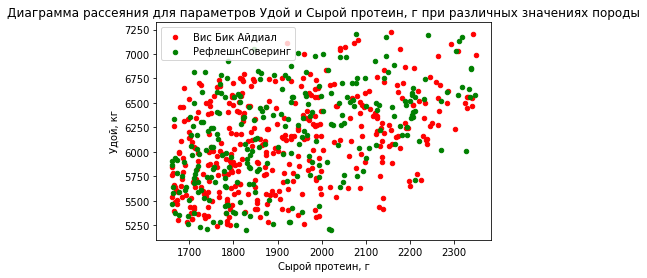

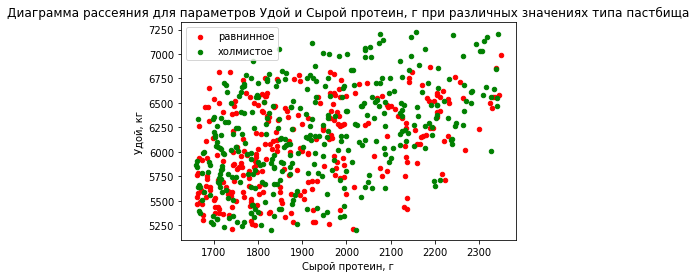

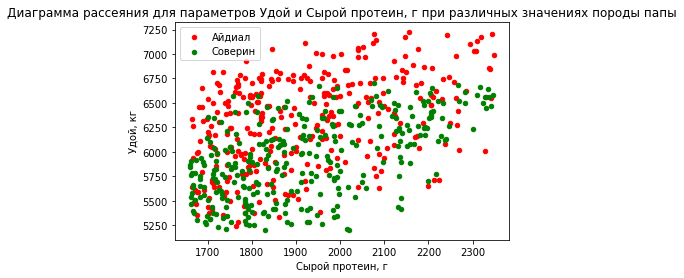

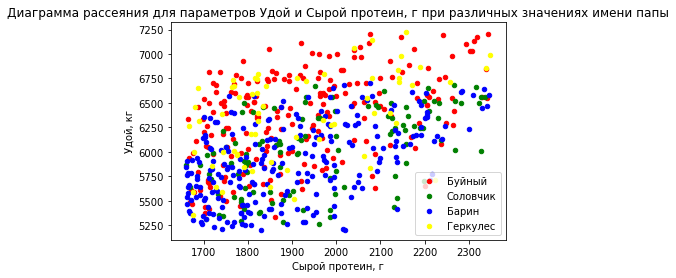

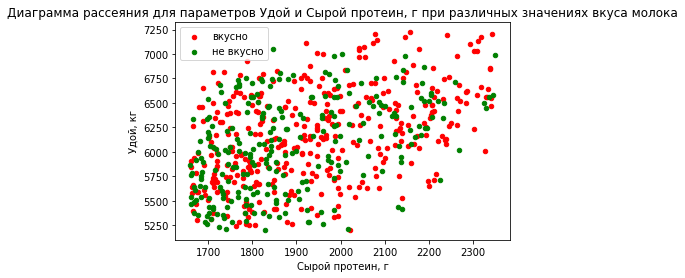

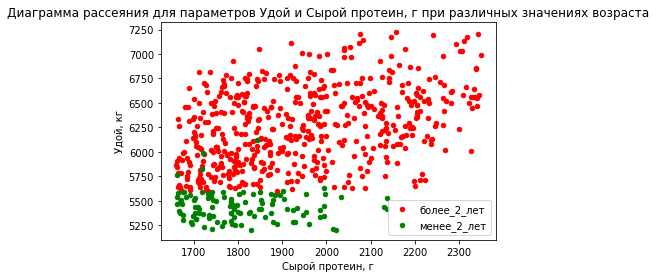

In [26]:
x_value,x_label = 'protein', 'Сырой протеин, г'

parametric_scatterplot('breed', 'породы', x_value,x_label)
parametric_scatterplot('pasture', 'типа пастбища',  x_value,x_label)
parametric_scatterplot('dad_breed', 'породы папы', x_value,x_label)
parametric_scatterplot('dad_name', 'имени папы', x_value,x_label)
parametric_scatterplot('flavour', 'вкуса молока', x_value,x_label)
parametric_scatterplot('age', 'возраста', x_value,x_label)

#### Диграмма рассеяния удоя и жирности молока для различных категориальных признаков

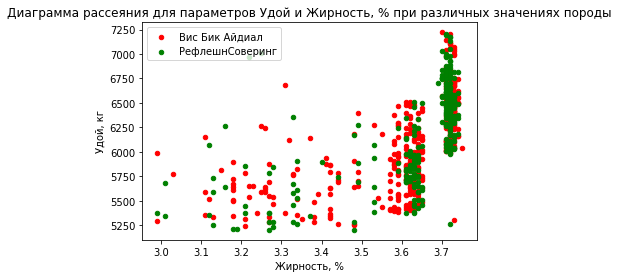

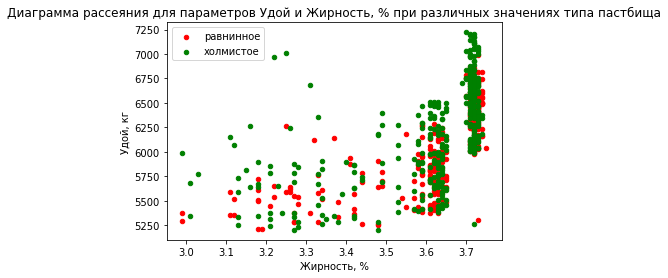

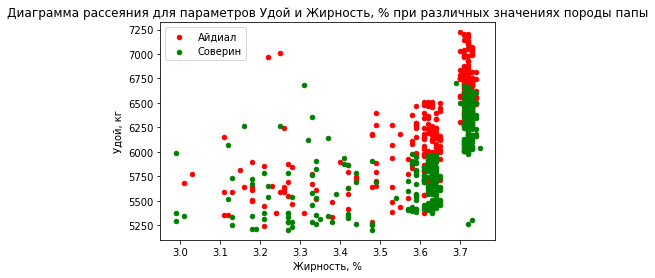

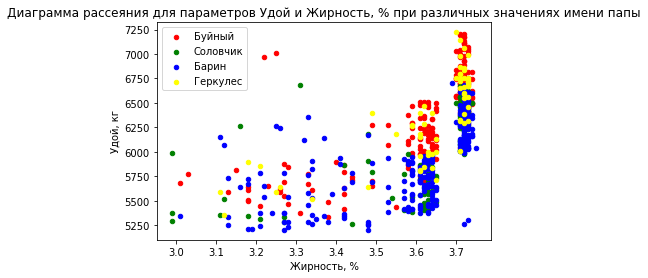

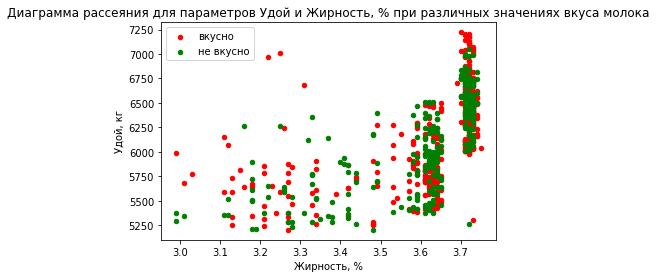

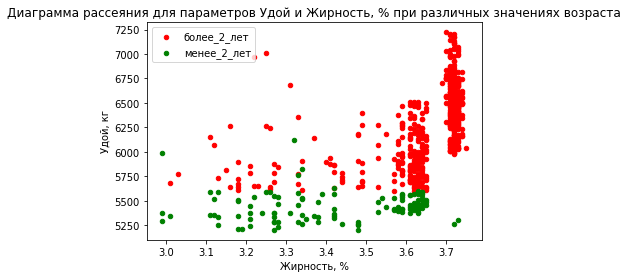

In [27]:
x_value,x_label = 'milk_fat', 'Жирность, %'

parametric_scatterplot('breed', 'породы', x_value,x_label)
parametric_scatterplot('pasture', 'типа пастбища',  x_value,x_label)
parametric_scatterplot('dad_breed', 'породы папы', x_value,x_label)
parametric_scatterplot('dad_name', 'имени папы', x_value,x_label)
parametric_scatterplot('flavour', 'вкуса молока', x_value,x_label)
parametric_scatterplot('age', 'возраста', x_value,x_label)

#### Диграмма рассеяния удоя и протеина в молоке для различных категориальных признаков

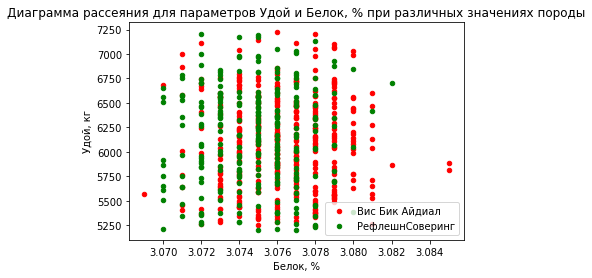

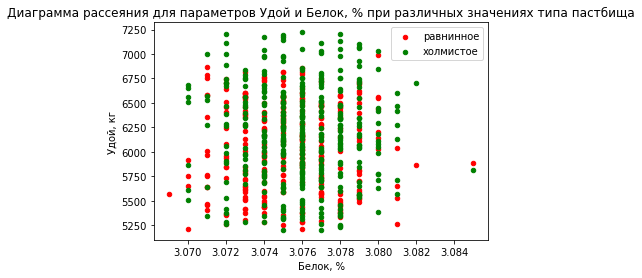

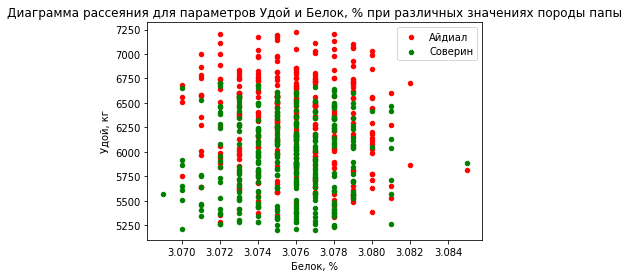

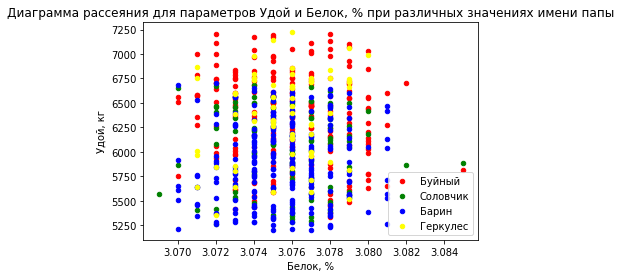

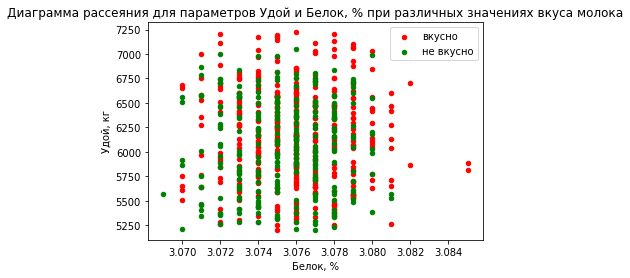

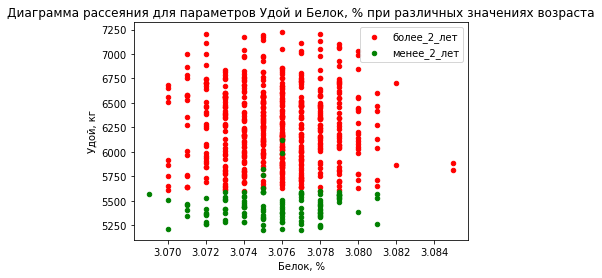

In [28]:
x_value,x_label = 'milk_protein', 'Белок, %'

parametric_scatterplot('breed', 'породы', x_value,x_label)
parametric_scatterplot('pasture', 'типа пастбища',  x_value,x_label)
parametric_scatterplot('dad_breed', 'породы папы', x_value,x_label)
parametric_scatterplot('dad_name', 'имени папы', x_value,x_label)
parametric_scatterplot('flavour', 'вкуса молока', x_value,x_label)
parametric_scatterplot('age', 'возраста', x_value,x_label)

#### Выводы по корреляционному анализу признаков

Заметим, что параметр возраст явно разделяет коров по удою 2 группы.

Также заметим, что порода папы делит коров (хотя и нечетко) на 2 группы.

Заметим также, что на диаграмме Удой-СПО (сахарно протеиновое соотношение) можно выделить 2 кластера с различным удоем, границу между этими кластерами можно выбрать следующей:

    `СПО = 0.91`
    
На основании этого введем соответствующий категориальный признак `sugar_to_protein_level`

In [29]:
main['sugar_to_protein_level'] = main['sugar_to_protein'].apply(lambda x: 'высокий' if x>0.91 else 'низкий')

display(main.head())

,id,yield,energetic_unit,protein,sugar_to_protein,breed,pasture,dad_breed,milk_fat,milk_protein,flavour,age,dad_name,sugar_to_protein_level
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,низкий
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,низкий
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,низкий
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный,низкий
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин,низкий


Категориальный параметр возраст также хорошо разбивает коров на 2 кластера с различным удоем

Заметим, что `Удой` зависит от `ЭКЕ` почти линейно, на рассмотрим также диагруммы рассеяния `Удой` - `ЭКЕ^2`, добавив соотетствующий новый столбец в таблицу

,yield,energetic_unit,energetic_unit_squared
yield,1.000000,0.765098,0.765530
energetic_unit,0.765098,1.000000,0.998868
energetic_unit_squared,0.765530,0.998868,1.000000


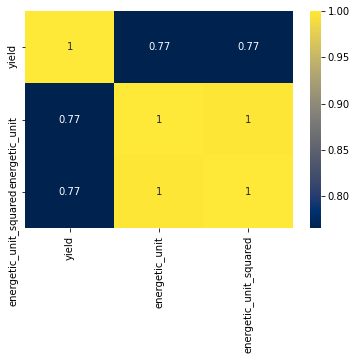

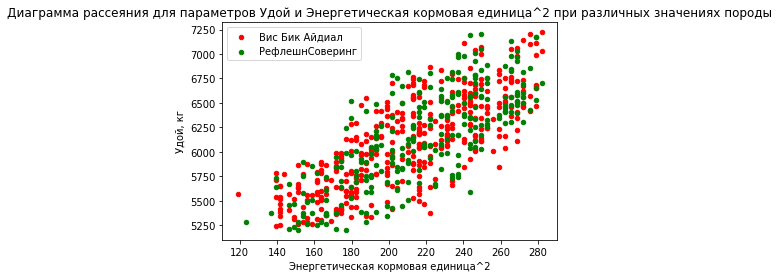

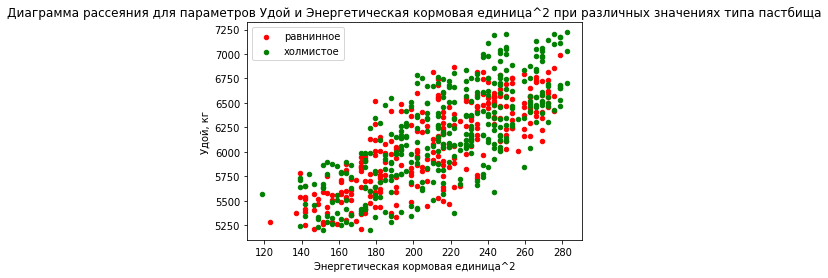

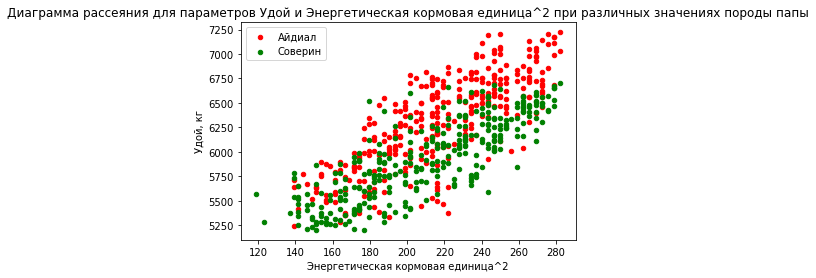

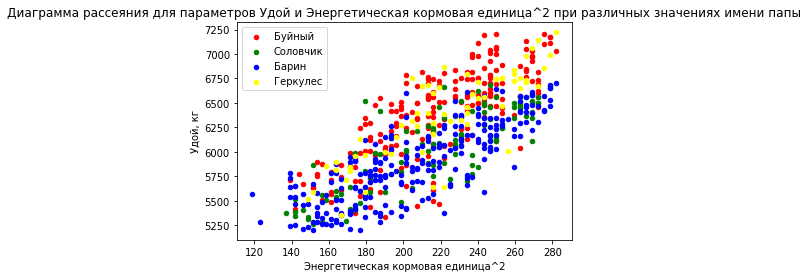

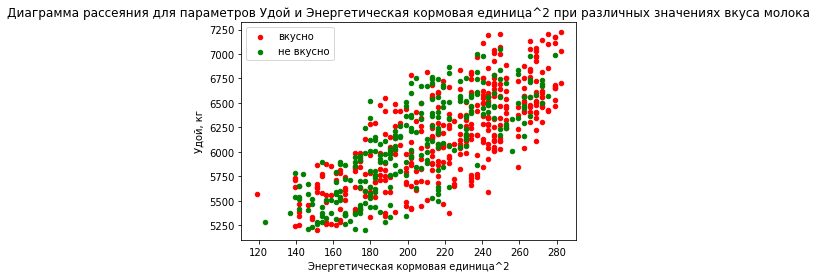

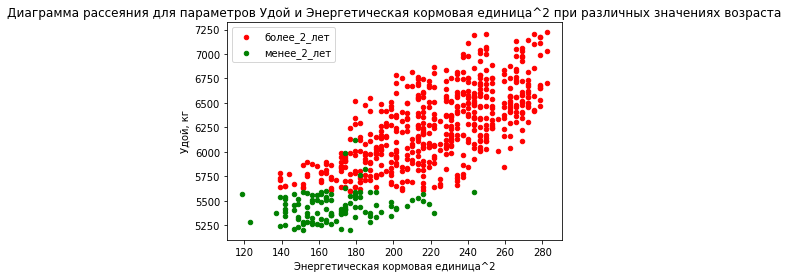

In [30]:
main['energetic_unit_squared'] = main['energetic_unit']**2

display(main[['yield', 'energetic_unit', 'energetic_unit_squared']].corr())

sns.heatmap(main[['yield', 'energetic_unit', 'energetic_unit_squared']].corr(), annot=True, cmap='cividis') 

x_value,x_label = 'energetic_unit_squared', 'Энергетическая кормовая единица^2'

parametric_scatterplot('breed', 'породы', x_value,x_label)
parametric_scatterplot('pasture', 'типа пастбища',  x_value,x_label)
parametric_scatterplot('dad_breed', 'породы папы', x_value,x_label)
parametric_scatterplot('dad_name', 'имени папы', x_value,x_label)
parametric_scatterplot('flavour', 'вкуса молока', x_value,x_label)
parametric_scatterplot('age', 'возраста', x_value,x_label)

Корреляция `Удоя` с новым признаком `ЭКЕ^2` не изменилась (вплоть до 2 порядка) по сравнению с `ЭКЕ`

Жирность молока и Удой связаны нелинейным образом.

Выделить явную зависимость Удоя от сырого протеина и протеина в молоке не удается

О мультиколлинеарности можно говорить только для признаков `ЭКЕ` и `ЭКЕ^2` (что в общем очевидно)

### Обучение модели линейной регрессии

В данном разделе обучим 3 модели линейной регрессии предсказывающих удой коров.

Обучение модели будет проводиться по следующим параметрам:
- `ЭКЕ` - параметр сильно связанный с удоем (и по данным и из общих соображений)
    <br>будут рассматриваться 2 вида данного параметра:
    - `ЭКЕ (energetic_unit)` - в 1 модели
    - `ЭКЕ^2 (energetic_unit_squared)` - во 2 модели
    <br>рассматривать их одновременно в одной модели бессмысленно из-за их мультиколлинеарности
- `СПО (sugar_to_protein)` - логично ожидать, что питание коровы и удой связаны
    <br>есть 2 вариации данного параметра:
    - `СПО (sugar_to_protein)` - количественный, будет использоваться в 1 модели
    - `Уровень СПО (sugar_to_protein_level)` - категориальный, будет использоваться во 2 модели
- `Сырой протеин (г.) (protein)` - есть слабая корреляция и вполне ожидаема связь удоя и питания коровы
- `Порода (breed)` - вполне логично ожидать что удой зависит от породы
- `Пастбище (pasture)` -  вполне логично ожидать что удой зависит от пастбища
- `Порода папы (dad_breed)` - судя по диаграммам рассеяния этот параметр хоть и не четко но делит коров на несколько групп
- `Возраст (age)` - явная связь с удоем
- `Имя папы (dad_name)` - данный параметр будет учитываться только при обучении 3 модели

In [31]:
x = 'breed'#'pasture'
for p in main[x].unique():
    print(p, ':', main.loc[main[x]==p, 'yield'].mean())
    
x = 'pasture'
for p in main[x].unique():
    print(p, ':', main.loc[main[x]==p, 'yield'].mean())

Вис Бик Айдиал : 6099.405913978495
РефлешнСоверинг : 6164.56640625
равнинное : 6056.287769784172
холмистое : 6181.314285714286


#### Первая модель

##### Подготовка данных

Разделим данные на обучающую  и тестовую выборки, масштабируем их методом `StandardScaler` и закодируем категориальные параметры методом `OneHotEncoding`

При разбивке данных на выборке фиксируем seed для всех 3 моделей чтобы сравнение их точности было корректным

In [32]:
seed = 1111

X = main[['energetic_unit', 'breed', 'pasture', 'dad_breed', 'sugar_to_protein', 'age', 'protein']]
y = main['yield']

categoric = ['breed', 'pasture', 'dad_breed', 'age']
numeric = ['energetic_unit', 'protein', 'sugar_to_protein']

# разбивка данных
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=seed
)

# метод масштабирования
scaler = StandardScaler()

# обучение скалера и масштабирование количественных параметров
X_train_scaled = scaler.fit_transform(X_train[numeric])
X_test_scaled = scaler.transform(X_test[numeric])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric)

# OHE с удалением дамми ловушек
encoder  = OneHotEncoder(drop='first',sparse=False)

# обучите и применение OHE
X_train_ohe = encoder.fit_transform(X_train[categoric])
X_test_ohe = encoder.transform(X_test[categoric])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=categoric)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=categoric)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_train.head(5))

,breed,pasture,dad_breed,age,energetic_unit,protein,sugar_to_protein
0,1.0,0.0,0.0,0.0,0.832089,-0.517271,0.849586
1,1.0,1.0,0.0,0.0,0.526324,-0.732151,0.544007
2,1.0,1.0,1.0,0.0,1.290736,0.463461,1.155164
3,0.0,1.0,0.0,0.0,1.749383,2.149438,1.155164
4,0.0,1.0,1.0,0.0,0.908530,0.380815,0.849586


##### Обучение модели

Обучим модель на подготовленных данных и вычислим предсказания модели для тестовой выборки

In [33]:
model_lr_1  = LinearRegression()
model_lr_1.fit(X_train, y_train)
predictions_1 = model_lr_1.predict(X_test)

##### Анализ остатков и R^2

Проведем анализ остатков модели (построим их распределение и диаграмму рассеяния)

Такжке рассмотрим значение метрики R^2

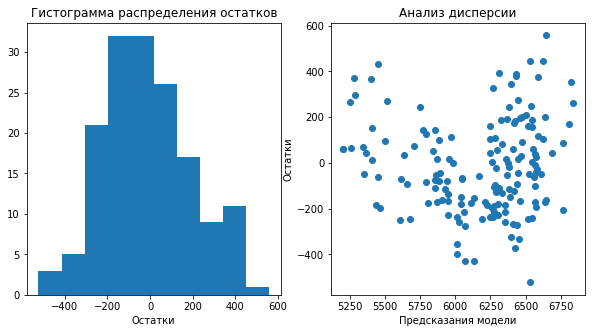

R^2: 0.7919176376394303


In [34]:
# анализ остатков
def res_plot(y_test, predictions):
    residuals = y_test - predictions

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(y=residuals, x=predictions)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

res_plot(y_test, predictions_1)
print('R^2:', r2_score(y_test, predictions_1)  )

Получили, что остатки распределены нормально, смещения нет (максимум гистограммы в 0), это является хорошим признаком

Однако диграмма рассеяния остатков показывает, что дисперсия зависит от предсказания модели (диаграмма рассеяния в форме рупора или песочных часов). Значит какие-то зависимости в модели не учтены.

Значение метрики R^2: `0.792`

Как уже отмечалось ранее сильнее всего с целевым параметром коррелирует параметр ЭКЕ, построим вторую модель в которой вместо ЭКЕ будет рассматриваться ЭКЕ^2

#### Вторая модель

Как уже отмечалось ранее сильнее всего с целевым параметром коррелирует параметр ЭКЕ. В данной модели вместо ЭКЕ будем рассматривать ЭКЕ^2 и использовать категориалную версию параметра СПО.

##### Подготовка данных

Разделим данные на обучающую  и тестовую выборки, масштабируем их методом `StandardScaler` и закодируем категориальные параметры методом `OneHotEncoding`

In [35]:
X = main[['energetic_unit_squared','breed','pasture','dad_breed','sugar_to_protein_level','age','protein']]
y = main['yield']

categoric = ['breed','pasture','dad_breed','age','sugar_to_protein_level']
numeric = ['energetic_unit_squared','protein']

# разбивка данных
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=seed
)

# метод масштабирования
scaler = StandardScaler()

# обучение скалера и масштабирование количественных параметров
X_train_scaled = scaler.fit_transform(X_train[numeric])
X_test_scaled = scaler.transform(X_test[numeric])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric)

# OHE с удалением дамми ловушек
encoder  = OneHotEncoder(drop='first',sparse=False)

# обучите и применение OHE
X_train_ohe = encoder.fit_transform(X_train[categoric])
X_test_ohe = encoder.transform(X_test[categoric])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=categoric)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=categoric)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_train.head(5))

,breed,pasture,dad_breed,age,sugar_to_protein_level,energetic_unit_squared,protein
0,1.0,0.0,0.0,0.0,0.0,0.827856,-0.517271
1,1.0,1.0,0.0,0.0,0.0,0.499549,-0.732151
2,1.0,1.0,1.0,0.0,0.0,1.336306,0.463461
3,0.0,1.0,0.0,0.0,0.0,1.863942,2.149438
4,0.0,1.0,1.0,0.0,0.0,0.911265,0.380815


##### Обучение модели

Обучим модель на подготовленных данных и вычислим предсказания модели для тестовой выборки

In [36]:
model_lr_2  = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions_2 = model_lr_2.predict(X_test)

##### Анализ остатков и R^2

Проведем анализ остатков модели (построим их распределение и диаграмму рассеяния)

Такжке рассмотрим значение метрики R^2

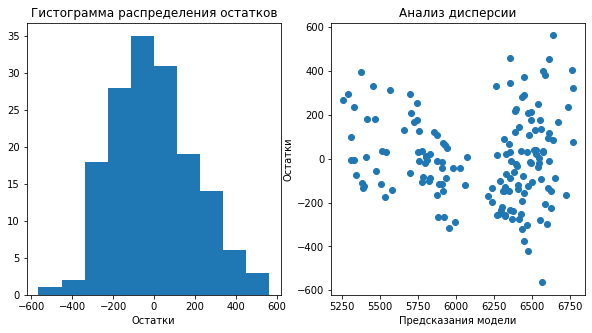

R^2: 0.8068722256564175


In [37]:
# анализ остатков
res_plot(y_test, predictions_2)
print('R^2:', r2_score(y_test, predictions_2)  )

Получили, что для данной модели остатки также распределены нормально и смещения нет, это является хорошим признаком

Однако диграмма рассеяния остатков показывает, что дисперсия все еще зависит от предсказания модели (диаграмма рассеяния в форме рупора или песочных часов). Значит рассмотрение параметра ЭКЕ^2 и перевод жирности молока в категориальный тип не убирают нелинейность

Значение метрики R^2: `0.807`

Это на 0.015 больше чем для предыдущей модели

#### Третья модель

Данная модель отличается от предыдущей только добавление нового признака `dad_name`

##### Подготовка данных

Разделим данные на обучающую  и тестовую выборки, масштабируем их методом `StandardScaler` и закодируем категориальные параметры методом `OneHotEncoding`

In [38]:
X = main[['energetic_unit_squared','breed','pasture','dad_breed','sugar_to_protein_level','age','protein', 'dad_name']]
y = main['yield']

categoric = ['breed','pasture','dad_breed','age','sugar_to_protein_level', 'dad_name']
numeric = ['energetic_unit_squared','protein']

# разбивка данных
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=seed
)

# метод масштабирования
scaler3 = StandardScaler()

# обучение скалера и масштабирование количественных параметров
X_train_scaled = scaler3.fit_transform(X_train[numeric])
X_test_scaled = scaler3.transform(X_test[numeric])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric)

# OHE с удалением дамми ловушек
encoder3  = OneHotEncoder(drop='first',sparse=False)

# обучите и применение OHE
X_train_ohe = encoder3.fit_transform(X_train[categoric])
X_test_ohe = encoder3.transform(X_test[categoric])

X_train_ohe = pd.DataFrame(X_train_ohe)
X_test_ohe = pd.DataFrame(X_test_ohe)#, columns=categoric)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_train.head(5))

,0,1,2,3,4,5,6,7,energetic_unit_squared,protein
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.827856,-0.517271
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.499549,-0.732151
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.336306,0.463461
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.863942,2.149438
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.911265,0.380815


##### Обучение модели

Обучим модель на подготовленных данных и вычислим предсказания модели для тестовой выборки

In [39]:
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions_3 = model_lr_3.predict(X_test)

##### Анализ остатков и R^2

Проведем анализ остатков модели (построим их распределение и диаграмму рассеяния)

Такжке рассмотрим значение метрики R^2

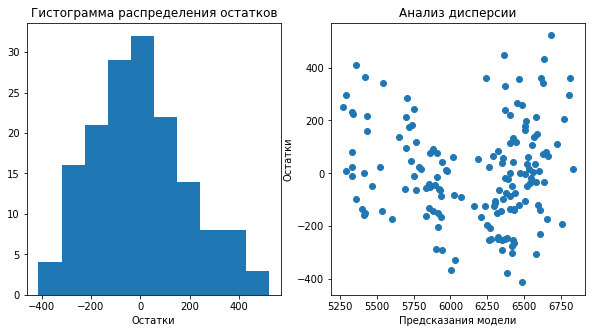

R^2: 0.8245330092177663


In [40]:
# анализ остатков
res_plot(y_test, predictions_3)
print('R^2:', r2_score(y_test, predictions_3)  )

Для третьей модели остатки также распределены нормально без смещения, и дисперсия также неоднородно распределена. Т.е. третья модель также не учитывает нелинейность.

Метрика R^2 для данной модели максимальна: `0.825`

#### Сравнение моделей

Сравним различные метрики для всех 3 моделей и оценим какая модель является лучшей

In [41]:
def rmse(a,b):
    return mean_squared_error(a, b, squared=False) 

m = [r2_score, mean_absolute_error,mean_squared_error,rmse]
p = [predictions_1, predictions_2, predictions_3]

c = ['Модель','R^2', 'MAE', 'MSE', 'RMSE']

res =[]

for i in range(len(p)):
    row = [i+1]
    for j in range(len(m)):
        row.append(m[j](y_test, p[i]))
    res.append(row)

display(pd.DataFrame(res, columns=c))

,Модель,R^2,MAE,MSE,RMSE
0,1,0.791918,167.630471,42204.614294,205.437617
1,2,0.806872,156.380174,39171.427761,197.917730
2,3,0.824533,150.038259,35589.353097,188.651406


Из таблицы метрик можно сделать вывод что наилучшие результаты дает 3 модель (по любой метрике)

Тем не менее результаты всех моделей достаточно близки

Среднеквадратичная ошибка для всех моделей не превышает 205кг удоя (189кг для 3 модели), что составляет чуть больше 3% от 6т.

Как уже отмеалось ранее полностью устранить нелинейность в данных не удалось (дисперсия остатков неоднородна)

Для оценки коров из стада к покупке будет использоваться 3 модель

In [42]:
interval = st.norm.interval(confidence=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3))

print()
print(f'95% доверительный интервал для 3 модели на тестовой выборке: ({interval[0]:.0f}, {interval[1]:.0f})')


95% доверительный интервал для 3 модели на тестовой выборке: (6090, 6222)


### Обучение модели логистической регрессии

В данном разделе обучим модель логистической регрессии, целевым бинарным признаком является вкус молока.

Обучение модели будет проводиться по следующим параметрам:
- `ЭКЕ^2 (energetic_unit_squared)` - модель линейной регрессии с данным параметром показала себя лучше чем с обычным
- `Порода (breed)` - вполне логично ожидать что качество молока зависит от породы
- `Пастбище (pasture)` -  вполне логично ожидать что качество молока зависит от пастбища
- `Порода папы (dad_breed)` 
- `Уровень СПО (sugar_to_protein_level)` - логично ожидать связь качества молока и питания коровы
- `Возраст (age)` 
- `Уровень жирности молока (milk_fat_level)` - логично ожидать что свойства молока влияют на его вкус
- `Белок в молоке,% (milk_protein)` - логично ожидать что свойства молока влияют на его вкус
- `Сырой протеин (г.) (protein)` - логично ожидать связь качества молока и питания коровы
- `Имя папы (dad_name)` - добавление данного параметра улучшило модель линейной регрессии поэтому используем его и для задачи классификации

Значения целевого бинарного признака `вкус молока`: вкусно/невкусно явно закодируем числовыми значениями, где:
- `1` - вкусное молоко
- `0` - невкусное молоко

#### Подготовка данных

Переведем жирность молока в категориальный параметр (пытаемся таким образом убрать нелинейность). 
Заметим, что на диаграмме рассеяния Удой-Жирность молока можно выделить 2 кластера с границей жирности 3.68%

In [43]:
main['milk_fat_level'] = main['milk_fat'].apply(lambda x: 'жирное' if x>3.68 else 'нежирное')

display(main.head())

,id,yield,energetic_unit,protein,sugar_to_protein,breed,pasture,dad_breed,milk_fat,milk_protein,flavour,age,dad_name,sugar_to_protein_level,energetic_unit_squared,milk_fat_level
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,низкий,201.64,нежирное
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,низкий,163.84,нежирное
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,низкий,196.00,нежирное
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный,низкий,153.76,нежирное
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин,низкий,163.84,жирное


In [44]:
X = main[['energetic_unit_squared','breed','pasture','dad_breed','sugar_to_protein_level','age','milk_fat_level', 'milk_protein','protein', 'dad_name']]
y = main['flavour']

# кодирование вручную чтобы точно понимать что означает 1 а что 0
y = y.apply(lambda x: 1 if x=='вкусно' else 0)

categoric = ['breed','pasture','dad_breed','age','sugar_to_protein_level', 'dad_name', 'milk_fat_level']
numeric = ['energetic_unit_squared','protein', 'milk_protein']

# разбивка данных
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=seed
)

# метод масштабирования
scaler_log = StandardScaler()

# обучение скалера и масштабирование количественных параметров
X_train_scaled = scaler_log.fit_transform(X_train[numeric])
X_test_scaled = scaler_log.transform(X_test[numeric])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric)

# OHE с удалением дамми ловушек
encoder_log  = OneHotEncoder(drop='first',sparse=False)

# обучите и применение OHE
X_train_ohe = encoder_log.fit_transform(X_train[categoric])
X_test_ohe = encoder_log.transform(X_test[categoric])

X_train_ohe = pd.DataFrame(X_train_ohe)
X_test_ohe = pd.DataFrame(X_test_ohe)#, columns=categoric)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_train.head(5))

,0,1,2,3,4,5,6,7,8,energetic_unit_squared,protein,milk_protein
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.827856,-0.517271,-1.837026
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.499549,-0.732151,0.151116
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.336306,0.463461,2.139257
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.863942,2.149438,1.741629
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.911265,0.380815,-0.644141


#### Обучение модели

In [45]:
log_reg  = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions_log_reg = log_reg.predict(X_test)

#### Оценка качества модели

Оценим качество обученной модели различными мериками и построим матрицу ошибок


Accuracy: 0.701
Precision: 0.746
Recall: 0.825


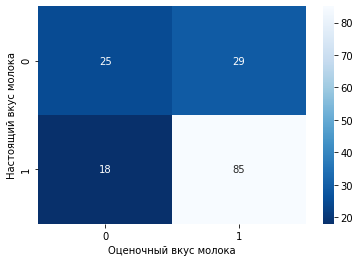

In [46]:
cm = confusion_matrix(y_test, predictions_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Настоящий вкус молока')
plt.xlabel('Оценочный вкус молока');

print()
print('Accuracy:', round(accuracy_score(y_test, predictions_log_reg),3))
print('Precision:', round(precision_score(y_test, predictions_log_reg),3))
print('Recall:', round(recall_score(y_test, predictions_log_reg),3))

#### Донастройка модели

Т.к. для фермера вкус молока является критически выжным, покупка коровы с невкусным молоком является критичной ошибкой (отказ от покупки хорошей коровы считаем менее критичным)

То есть наиболее критична ошибка 1 рода, поэтому изменением порога классификации нужно уменьшить вероятность таких ошибок, то есть максимизировать значение метрики `precision`.

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Пороговое значение,precision,accuracy,число ошибок 1 рода
0,0.50,0.745614,0.700637,11
1,0.52,0.745455,0.687898,11
2,0.55,0.747573,0.668790,11
3,0.57,0.731183,0.617834,10
4,0.60,0.765432,0.617834,9
5,0.62,0.760000,0.592357,8
6,0.65,0.772727,0.573248,8
7,0.68,0.830189,0.566879,4
8,0.70,0.847826,0.547771,4
9,0.72,0.828571,0.490446,2


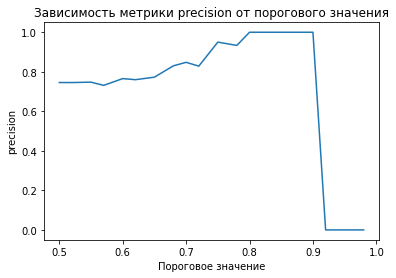

In [47]:
y_proba = log_reg.predict_proba(X_test)[:,1]
#print(y_proba)

def count_type_1_error(real, prediction):
    # real - prediction = -1 - ошибка 1 рода
    #                                   0 - ошибки нет
    #                                   1 - ошибка 2 рода
    return (real - prediction).apply(lambda x: 1 if x==-1 else 0).sum()

columns = ['Пороговое значение', 'precision', 'accuracy', 'число ошибок 1 рода']

thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 20,endpoint=False)]

res = []

for i in thresholds:
    y_prediction = pd.Series(y_proba).apply(lambda x: 1 if x >= i else 0)
    res.append([i, precision_score(y_test, y_prediction), accuracy_score(y_test, y_prediction), count_type_1_error(y_test, y_prediction)])

res = pd.DataFrame(res, columns=columns)

display(res)

fig, axes = plt.subplots()
axes.plot(res['Пороговое значение'], res['precision'])
axes.set_xlabel('Пороговое значение')
axes.set_ylabel('precision')
axes.set_title('Зависимость метрики precision от порогового значения')
plt.show()

Получили, что при пороговом значении `0.8` число ошибок 1 рода равно 0.

Построим матрицу ошибок для нового порогового значения.


Accuracy: 0.42
Precision: 1.0
Recall: 0.117


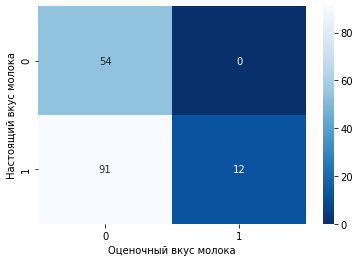

In [48]:
THRESHOLD = 0.8

cm = confusion_matrix(y_test, pd.Series(y_proba).apply(lambda x: 1 if x >= THRESHOLD else 0))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Настоящий вкус молока')
plt.xlabel('Оценочный вкус молока');

print()
print('Accuracy:', round(accuracy_score(y_test, pd.Series(y_proba).apply(lambda x: 1 if x >= THRESHOLD else 0)),3))
print('Precision:', round(precision_score(y_test, pd.Series(y_proba).apply(lambda x: 1 if x >= THRESHOLD else 0)),3))
print('Recall:', round(recall_score(y_test, pd.Series(y_proba).apply(lambda x: 1 if x >= THRESHOLD else 0)),3))

С новым пороговым значением модель больше не совершает ошибок 1 рода, однако из тестовой выборки размером около 150 коров модель отметила лишь 12 коров как имеющих вкусное молоко (хотя всего хороших коров около 100).

Также с новым порогом сильно упала общая точность модели (метрика accuracy)

Таким образом если небходимо выбрать некоторое число коров из небольшого набора модель с новым порогом может не выбрать никого хотя хорошие коровы могут там быть. В таком случае может быть необходимо снизить порог классификации, хоть при этом и повясятся риски выбрать неудачную корову.

## Выводы

### Применение моделей к стаду на продажу

Для коров рассматриваемых фермером к покупке неизвестны параметры `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют, однако фермер планирует увеличить эти значения на 5% для новых коров относительно средних значений для коров в его нынешнем стаде.

С учетом этого предскажем удой и вкус молока для коров рассматриваемых к покупке

Рассчитаем значения параметров `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` и приведем `СПО` и `жирность молока (%)` к категориальному типу:

In [49]:
new_energetic_unit = main['energetic_unit'].mean() * 1.05
new_protein = main['protein'].mean() * 1.05
new_sugar_to_protein = main['sugar_to_protein'].mean() * 1.05

new_sugar_to_protein_level = 'высокий' if new_sugar_to_protein>0.91 else 'низкий'

Добавим соответствующие столбцы в таблицу `buy` и подготовим данные из нее к применению моделей.

In [50]:
buy['energetic_unit'] = new_energetic_unit
buy['energetic_unit_squared'] = new_energetic_unit**2
buy['protein'] = new_protein
buy['sugar_to_protein_level'] = new_sugar_to_protein_level
buy['milk_fat_level'] = buy['milk_fat'].apply(lambda x: 'жирное' if x>3.68 else 'нежирное')
#display(buy)

#данные для модели линейной регрессии
categoric = ['breed','pasture','dad_breed','age','sugar_to_protein_level', 'dad_name']
numeric = ['energetic_unit_squared','protein']

buy_scaled = scaler3.transform(buy[numeric])
buy_scaled = pd.DataFrame(buy_scaled, columns=numeric)

buy_ohe = encoder3.transform(buy[categoric])
buy_ohe = pd.DataFrame(buy_ohe)#, columns=categoric)

buy_prepared_lin_reg = pd.concat([buy_ohe, buy_scaled], axis=1)

#данные для модели логистической регрессии
categoric = ['breed','pasture','dad_breed','age','sugar_to_protein_level', 'dad_name', 'milk_fat_level']
numeric = ['energetic_unit_squared','protein', 'milk_protein']

buy_scaled = scaler_log.transform(buy[numeric])
buy_scaled = pd.DataFrame(buy_scaled, columns=numeric)

buy_ohe = encoder_log.transform(buy[categoric])
buy_ohe = pd.DataFrame(X_test_ohe)#, columns=categoric)

buy_prepared_log_reg = pd.concat([buy_ohe, buy_scaled], axis=1)

#### Предсказание удоя коров к покупке

In [51]:
buy['yield'] = model_lr_3.predict(buy_prepared_lin_reg)
display(buy.sort_values(by='yield'))

,breed,pasture,dad_breed,dad_name,milk_fat,milk_protein,age,energetic_unit,energetic_unit_squared,protein,sugar_to_protein_level,milk_fat_level,yield
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6092.286657
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6301.021114
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6306.266454
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,233.361138,2019.947532,высокий,жирное,6351.209896
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,233.361138,2019.947532,высокий,жирное,6351.209896
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6369.318278
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,233.361138,2019.947532,высокий,жирное,6369.318278
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6372.505680
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6528.128574
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6528.128574


#### Предсказание вкуса молока коров к покупке

Здесь используется пороговое значение `0.8`

In [52]:
THRESHOLD = 0.8

buy['flavour'] = pd.Series(log_reg.predict_proba(X_test)[:,1]).apply(lambda x: 'вкусное' if x >= THRESHOLD else 'не вкусное')
display(buy.sort_values(by='flavour'))

print('Коров со вскусным молоком в стаде на продажу:', buy.loc[buy['flavour']=='вкусное', 'flavour'].count())

,breed,pasture,dad_breed,dad_name,milk_fat,milk_protein,age,energetic_unit,energetic_unit_squared,protein,sugar_to_protein_level,milk_fat_level,yield,flavour
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6589.447926,не вкусное
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6301.021114,не вкусное
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6306.266454,не вкусное
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6599.613140,не вкусное
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6547.254288,не вкусное
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6369.318278,не вкусное
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6528.128574,не вкусное
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6372.505680,не вкусное
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,233.361138,2019.947532,высокий,жирное,6351.209896,не вкусное
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,233.361138,2019.947532,высокий,жирное,6596.425738,не вкусное


Коров со вскусным молоком в стаде на продажу: 0


При пороговом значении `0.8` модель логистической регрессии не предсказала ни одной коровы со вкусным молоком.

Если все же есть необходимость выбрать коров из данного набора то необходимо понижать пороговое значение, но при этом растет вероятность выбрать неправильную корову.

Рассмотрим пороговое значение `0.7`, для него вероятность того, что молоко оцененное как вкусное окажется невкусным чуть более 15%.

При таком пороговом значении в стаде не продажу окажется 2 коровы со вкусным молоком.

Т.к. такое пороговое значение дало ненулевое число коров со вкусным молоком (хоть и с 15% вероятностью ошибки) будем использовать его для итоговых рекомендаций

In [53]:
THRESHOLD = 0.7

buy['flavour'] = pd.Series(log_reg.predict_proba(X_test)[:,1]).apply(lambda x: 'вкусное' if x >= THRESHOLD else 'не вкусное')
display(buy.sort_values(by='flavour'))

,breed,pasture,dad_breed,dad_name,milk_fat,milk_protein,age,energetic_unit,energetic_unit_squared,protein,sugar_to_protein_level,milk_fat_level,yield,flavour
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6528.128574,вкусное
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6528.128574,вкусное
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6589.447926,не вкусное
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6301.021114,не вкусное
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6306.266454,не вкусное
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6599.613140,не вкусное
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6547.254288,не вкусное
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6369.318278,не вкусное
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6372.505680,не вкусное
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,233.361138,2019.947532,высокий,жирное,6351.209896,не вкусное


#### Рекомендованные к покупке коровы

Учитывая что фермер хочет от коров удой не менее 6000кг и вкусное молоко можно порекомендовать к покупке следующих коров

In [54]:
display(buy[(buy['yield']>=6000) & (buy['flavour']=='вкусное')])

,breed,pasture,dad_breed,dad_name,milk_fat,milk_protein,age,energetic_unit,energetic_unit_squared,protein,sugar_to_protein_level,milk_fat_level,yield,flavour
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6528.128574,вкусное
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,233.361138,2019.947532,высокий,нежирное,6528.128574,вкусное


### Общие выводы

В данной работе рассмотрены данные о стаде фермера, проведен их исследоательский анализ и корреляционный анализ признаков.

На основе этого были построены 3 модели линейной регрессии предсказывающих удой коров из которых на основании метрик была выбрана одна лучшая

Также была построена модель логистической регрессии для предсказания вкуса молока (бинарный признак)

На основе двух этих моделей были предсказаны удой и вкус молока из стада коров "ЭкоФерма" и были свормированы рекомендации для фермера (см. выше) по покупке оптимальных коров из данного стада (удой не менее 6т. и вкусное молоко)

К сожалению в ходе работы не удалось полностью убрать нелинейность между входными признаками модели линейной регрессии и целевым параметром (удой), поэтому остатки модели оказываются распределены не совсем однородно.

Для модели логистической регрессии было решено, что наиболее критичными являются ошибки 1 рода. С целью их минимизации было изменено пороговое значение классификатора. Однако при минимизации числа ошибок 1 рода выросло число ошибок 2 рода и упала общая точность модели (accuracy). 

Если необходимо выбрать определенное число коров из стада не слишком большого размера имеет смысл снизить порог классификации хоть при этом и вырастет вероятность ошибок 1 рода.